In [21]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

In [29]:
input_file = "sales.csv"
file_reader = csv.reader(open(input_file, mode="r"), delimiter=",")

In [30]:
X = [] 
for count, row in enumerate(file_reader) : 
    if not count : 
        names = row[1:]
        continue
    
    X.append([float(x) for x in row[1:]])
X = np.array(X)

In [31]:
X

array([[ 12449.,   8735.,   7351.,    203.,   2528.,   1269.],
       [  6528.,  10103.,   9835.,   1664.,   3411.,   1737.],
       [  6231.,   9223.,   8083.,   2631.,   3774.,   7394.],
       ..., 
       [ 13302.,  15463.,  29256.,    416.,  15433.,   2041.],
       [ 10004.,   1989.,   2282.,   1027.,    160.,   2022.],
       [  2550.,   1670.,   2510.,     69.,    462.,     55.]])

In [32]:
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

In [33]:
#clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=26006.389359024277, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [34]:
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

In [35]:
names

['Tshirt', 'Tank top', 'Halter top', 'Turtleneck', 'Tube top', 'Sweater']

In [38]:
print("\nNumber of clusters in input data =", num_clusters)
print("\nCenters of clusters:")
print("\t".join([name[:3] for name in names]))
for cluster_center in cluster_centers : 
    print("\t".join([str(int(x)) for x in cluster_center]))


Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
7852	4939	63081	134	40066	1332
35314	16745	12775	66900	1298	5613
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
28333	34263	24065	5575	4229	18076
14987	46397	97393	1127	37315	3235


In [39]:
cluster_centers_2d = cluster_centers[:, 1:3]

In [40]:
cluster_centers_2d

array([[  4637.99746835,   6539.08607595],
       [ 44199.        ,  56158.5       ],
       [  4939.        ,  63081.        ],
       [ 16745.        ,  12775.        ],
       [ 77873.        ,  32543.        ],
       [ 29186.        ,  19415.        ],
       [ 40539.        ,  20120.        ],
       [ 34263.        ,  24065.        ],
       [ 46397.        ,  97393.        ]])

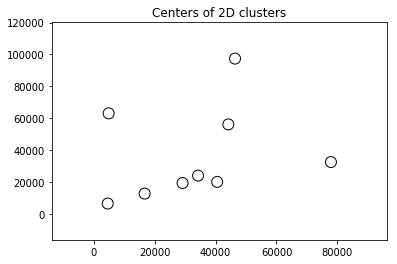

In [43]:
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1],
           s=120, edgecolors="black", facecolors="none")
offset = 0.25
plt.xlim(
cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp())
plt.ylim(
cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title("Centers of 2D clusters")
plt.show()